In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#plt.style.use('dark_background') # Uncomment for dark themes
import numpy as np

from ipywidgets import widgets  

import numpy.random as random

# Central Limit Theorem

The **central limit theorem** states that, given certain conditions, the arithmetic mean of a sufficiently large number of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution.

The following code takes *numVariables* samples from either a uniform, exponential or binomial (binary, with P(1) = 0.4) distribution and calculates their mean. It does this *numSamples* times, collecting samples, and then draws their histogram.


In [2]:
def centralLimit(numVariables, numSamples, distribution, plotNorm):
    random.seed(23)
    samples = []
    for sample in range(numSamples):
        sampleValue = 0.0
        for variable in range(numVariables):
            if(distribution == "uniform"):
                randomValue = np.random.uniform()
                
            if(distribution == "exponential"):
                randomValue = np.random.exponential()
            
            if(distribution == "binomial"):
                randomValue = np.random.binomial(1, 0.4)
                
            sampleValue += randomValue
        samples.append(sampleValue / numVariables)
    fig = plt.figure(figsize=(10,5))
    fig.patch.set_alpha(0.0)
    plt.gca().patch.set_alpha(0.0)
    n, bins, patches = plt.hist(samples, 50, normed=True, color='darkgrey')
    if(plotNorm == True):
        y = mlab.normpdf(bins, np.mean(samples), np.std(samples))
        l = plt.plot(bins, y, 'r--', linewidth=3)
    

# Things to try

Set *numVariables* to 1 and *numSamples* very high to see what the underlying distributions probability density function looks like. Then, increase the number of variables whose mean is taken and watch the distribution of their mean converge towards the normal distribution.

If you check plotNorm, the PDF of a normal distribution with the sample mean and sample standard deviation will be overlaid over the histogram, as well.

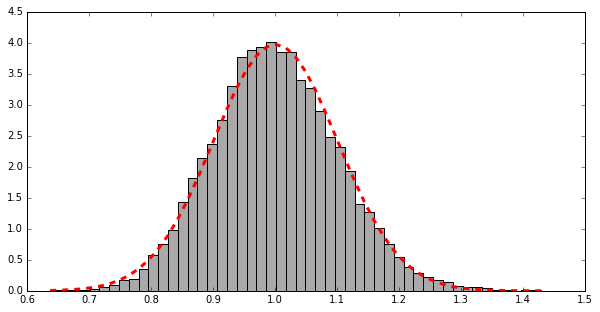

In [3]:
widgets.interact(
    centralLimit, 
    numVariables=(1,100,1), 
    numSamples=(1, 20000, 100), 
    distribution=("uniform", "exponential", "binomial"),
    plotNorm=False
)